# Imports and Functions (run first)
This notebook was written to run on Google Colaboratory

In [36]:
# Imports for all problems
import numpy as np
from sympy import Matrix, latex, Rational, symbols, simplify, expand, cos, sin, pi
from IPython.display import display, Math
import random

def mprint(matrix):
    display(Math(latex(matrix)))

def ansprint(ftext):
    print("*"*35 + "--ANSWER--" + "*"*35 + "\n")
    print(ftext)
    print("\n" + "*"*35 + "--ANSWER--" + "*"*35)

def row_replace(self, x, y, z):
    """
    Replace row x with row_x + y * row_z.
    x: target row index (1st row is 1)
    y: scalar multiplier
    z: source row index (1st row is 1)
    """
    result = self.elementary_row_op(op="n->n+km", row=(x-1), k=y, row1=(z-1))
    return result

def row_scale(self, x, y):
    """
    Scale row x by y
    x: target row index (1st row is 1)
    y: scalar multiplier
    """
    result = self.elementary_row_op(op="n->kn", row=(x-1), k=y)
    return result

def row_switch(self, x, y):
    """
    Swap rows x and y.
    x: first row index (1st row is 1)
    y: second row index (1st row is 1)
    """
    result = self.copy()
    result.row_swap(x-1, y-1)
    return result

# Add row_rep to Matrix class
Matrix.row_replace = row_replace
Matrix.row_scale = row_scale
Matrix.row_switch = row_switch

# Test Matrices

In [2]:
# some useful matrices for testing
# Create symbols for the first 16 lowercase letters
letters = symbols('a b c d e f g h i j k l m n o p')

# Create a 4x4 matrix using the symbols
Avar = Matrix(4, 4, letters)
mprint(Avar)

# matrix with random numbers
random.seed(88)
Arand = Matrix([[random.randint(0, 9) for _ in range(4)] for _ in range(4)])
mprint(Arand)

# Matrix with rows identified
Arows = Matrix(np.matrix('1 1 1 1;2 2 2 2;3 3 3 3;4 4 4 4'))
mprint(Arows)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 1

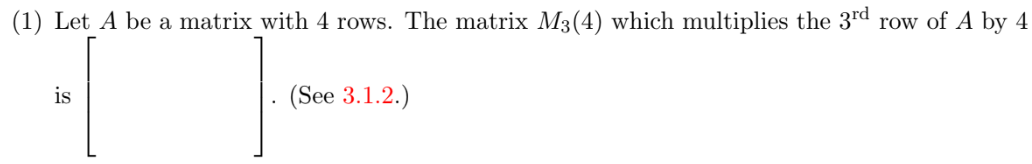

In [3]:
# let's try the identity matrix with a 4 in the 3rd row
M1 = Matrix(np.matrix('1 0 0 0;0 1 0 0;0 0 4 0;0 0 0 1'))
mprint(M1)
mprint(M1*Arows)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
ansprint("M3(4) is the identity matrix with a 4 in the 3rd row instead of 1")

***********************************--ANSWER--***********************************

M3(4) is the identity matrix with a 4 in the 3rd row instead of 1

***********************************--ANSWER--***********************************


In [5]:
# if we do A*M, does it multiply the 3rd column by 4? (it does)
Arows*M1

Matrix([
[1, 1,  4, 1],
[2, 2,  8, 2],
[3, 3, 12, 3],
[4, 4, 16, 4]])

# Exercise 2

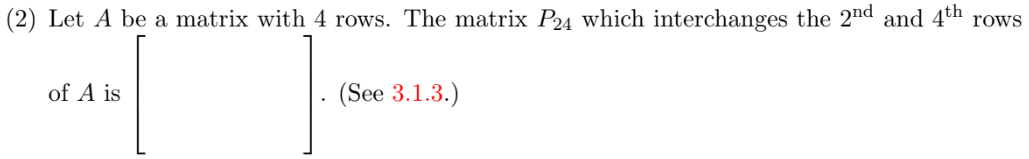

In [6]:
# Find a matrix P24 so that P24*A swaps the 2nd and 4th rows.
# try this matrix to swap rows 2 and 4 -- Wow! that worked!
M2 = Matrix([[1, 0, 0, 0],
             [0, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]])
M2 * Arows

Matrix([
[1, 1, 1, 1],
[4, 4, 4, 4],
[3, 3, 3, 3],
[2, 2, 2, 2]])

In [7]:
ansprint("P24 is identity matrix with diagonal 2 and 4 set to zero and\n" +
         "(2,4) = (4,2) = 1")

***********************************--ANSWER--***********************************

P24 is identity matrix with diagonal 2 and 4 set to zero and
(2,4) = (4,2) = 1

***********************************--ANSWER--***********************************


# Exercise 3

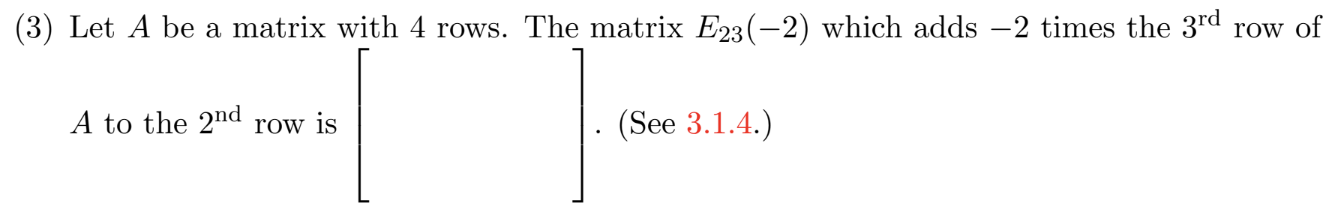

In [8]:
# Add -2 * the 3rd row to the 2nd row
# let's try this
M3 = Matrix([[1, 0,  0, 0],
             [0, 1, -2, 0],
             [0, 0,  1, 0],
             [0, 0,  0, 1]])
mprint(Arand)
print()
M3 * Arand

<IPython.core.display.Math object>

Matrix([
[  6, 3,  5, 2],
[-14, 4, -6, 3],
[  7, 2,  3, 1],
[  2, 9,  2, 7]])

In [9]:
ansprint("E23(-2) is the identity matrix with -2 added at (2,3)")
mprint(M3)

***********************************--ANSWER--***********************************

E23(-2) is the identity matrix with -2 added at (2,3)

***********************************--ANSWER--***********************************


<IPython.core.display.Math object>

# Exercise 4

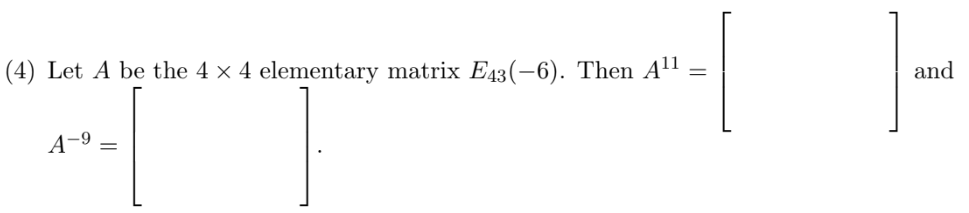

In [10]:
A4 = Matrix([[1, 0,  0, 0],
             [0, 1,  0, 0],
             [0, 0,  1, 0],
             [0, 0, -6, 1]])
A4 * Avar

Matrix([
[       a,        b,        c,        d],
[       e,        f,        g,        h],
[       i,        j,        k,        l],
[-6*i + m, -6*j + n, -6*k + o, -6*l + p]])

In [11]:
ansprint("A^11 and A^(-9) are shown below:")
display(Math(latex(A4 ** 11) + "," + latex(A4 ** -9)))

***********************************--ANSWER--***********************************

A^11 and A^(-9) are shown below:

***********************************--ANSWER--***********************************


<IPython.core.display.Math object>

In [12]:
A4.inv() # same as A4 ** -1

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 6, 1]])

# Exercise 5

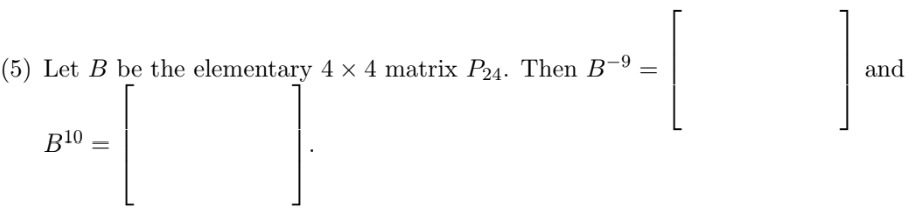

In [13]:
B5 = Matrix([[1, 0, 0, 0],
             [0, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]])
B5 * Arows

Matrix([
[1, 1, 1, 1],
[4, 4, 4, 4],
[3, 3, 3, 3],
[2, 2, 2, 2]])

In [14]:
ansprint("""B^(-9) and A^10 are shown below:
    B^(even number) is reverse swaps back to original
    B^(-1) is the same as B, so also a swap.""")
display(Math(latex(B5 ** -9) + "," + latex(B5 ** 10)))

***********************************--ANSWER--***********************************

B^(-9) and A^10 are shown below:
    B^(even number) is reverse swaps back to original
    B^(-1) is the same as B, so also a swap.

***********************************--ANSWER--***********************************


<IPython.core.display.Math object>

In [15]:
B5.inv() # is the same

Matrix([
[1, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0],
[0, 1, 0, 0]])

# Exercise 6

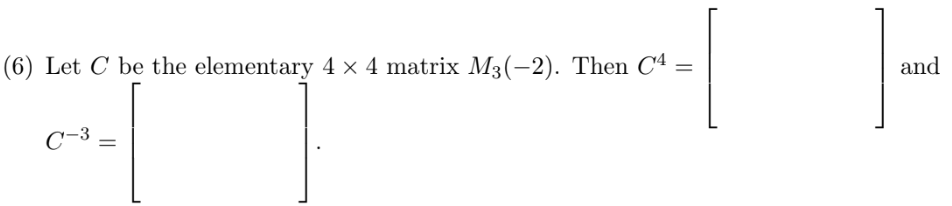

In [16]:
# let's try the identity matrix with a 4 in the 3rd row
C6 = Matrix(np.matrix('1 0 0 0;0 1 0 0;0 0 -2 0;0 0 0 1'))
mprint(C6)
mprint(C6*Avar)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
ansprint("""C^4 and C^(-3)) are shown below:
    The scalar is scaled to the power of the matrix power.""")
display(Math(latex(C6 ** 4) + "," + latex(C6 ** -3)))

***********************************--ANSWER--***********************************

C^4 and C^(-3)) are shown below:
    The scalar is scaled to the power of the matrix power.

***********************************--ANSWER--***********************************


<IPython.core.display.Math object>

# Exercise 7

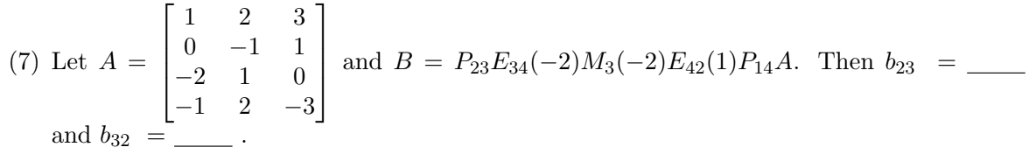

In [18]:
# P is swap, M is multiply, E is add another row
P23 = Matrix([[1, 0, 0, 0],
              [0, 0, 1, 0],
              [0, 1, 0, 0],
              [0, 0, 0, 1]])

E34_n2 = Matrix([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1,-2],
                 [0, 0, 0, 1]])

M3_n2 = Matrix([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0,-2, 0],
               [0, 0, 0, 1]])

E42_1 = Matrix([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 1, 0, 1]])

P14 = Matrix([[0, 0, 0, 1],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [1, 0, 0, 0]])

A7 = Matrix([[ 1, 2, 3],
             [ 0,-1, 1],
             [-2, 1, 0],
             [-1, 2,-3]])

B7 = P23 * E34_n2 * M3_n2 * E42_1 * P14 * A7
mprint(B7)

<IPython.core.display.Math object>

In [19]:
ansprint(f"If I didn't make any mistakes (!), b23 = {B7[1,2]} and b32 = {B7[2,1]}")

***********************************--ANSWER--***********************************

If I didn't make any mistakes (!), b23 = -8 and b32 = -1

***********************************--ANSWER--***********************************


# Exercise 8

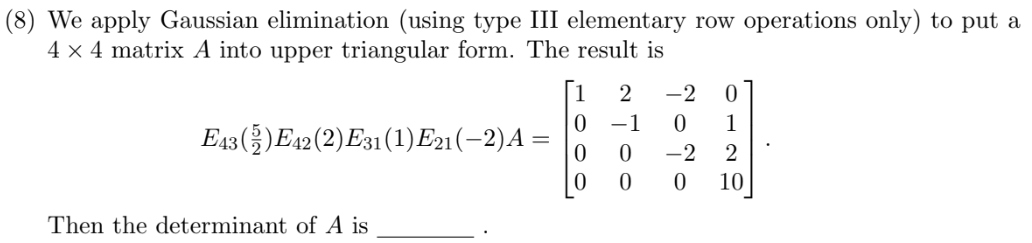

In [20]:
# Matrix manipulations have the following effects on the determinant:
# Row swapping (I): If two rows are swapped, the determinant of the resulting matrix is multiplied by −1-1-1
# Scaling a row (II): If a row is multiplied by a nonzero scalar (k), the determinant is multiplied by (k).
# Adding a multiple of one row to another (III): This operation does not change the determinant.

# Since only type III operations were performed, the determinant of A is the same as the determinant of the result
A8 = Matrix(np.matrix('1 2 -2 0;0 -1 0 1;0 0 -2 2;0 0 0 10'))
ansprint(f"The determinant of A is {A8.det()}")

***********************************--ANSWER--***********************************

The determinant of A is 20

***********************************--ANSWER--***********************************


In [21]:
# Quick check (should still be 20)
(A8 * E34_n2 * E42_1).det()

20

# Exercise 9

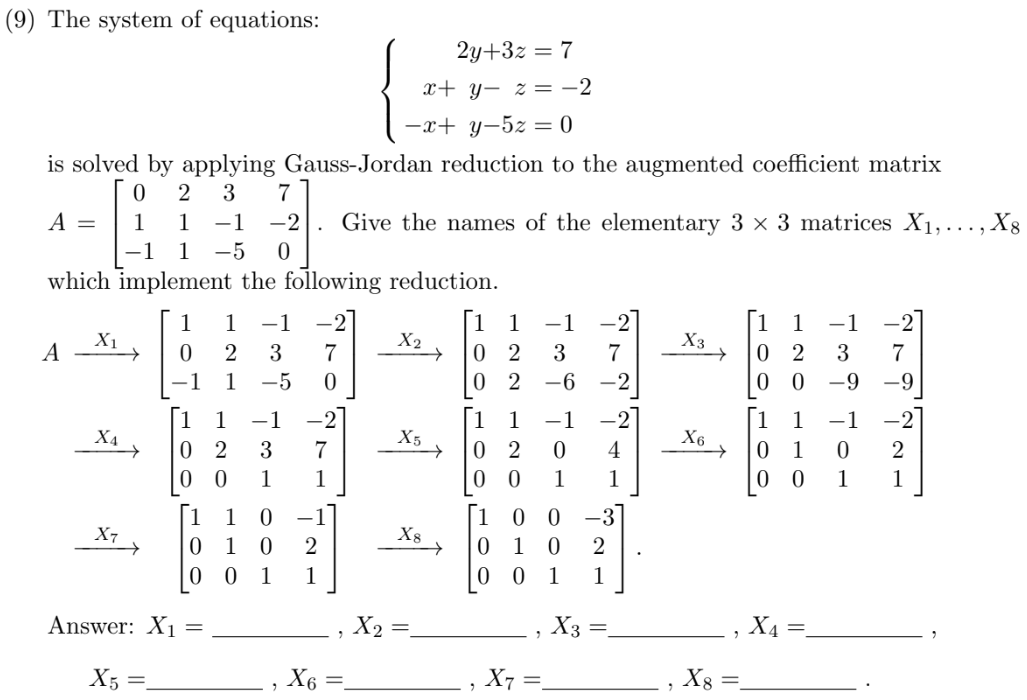

In [22]:
# I'll do this with his code and run the code to confirm using my functions
# P is swap, M is multiply, E is add another row
# E12(-1) * E13(1) * M2(1/2) * E23(-3) * M3(-1/9) * E32(-1) * E31(1) * P12 * A
A9 = Matrix(np.matrix('0 2 3 7;1 1 -1 -2;-1 1 -5 0'))
(A9.row_switch(1,2).row_replace(3,1,1).row_replace(3,-1,2).row_scale(3,Rational(-1,9))
    .row_replace(2,-3,3).row_scale(2, Rational(1,2)).row_replace(1,1,3)
    .row_replace(1,-1,2)
)

Matrix([
[1, 0, 0, -3],
[0, 1, 0,  2],
[0, 0, 1,  1]])

In [23]:
ansprint("""X1 = P12, X2 = E31(1), X3 = E32(-1), X4 = M3(-1/9),
  X5 = E23(-3), X6 = M2(1/2), X7 = E13(1), X8 = E12(-1)""")

***********************************--ANSWER--***********************************

X1 = P12, X2 = E31(1), X3 = E32(-1), X4 = M3(-1/9),
  X5 = E23(-3), X6 = M2(1/2), X7 = E13(1), X8 = E12(-1)

***********************************--ANSWER--***********************************


# Exercise 10

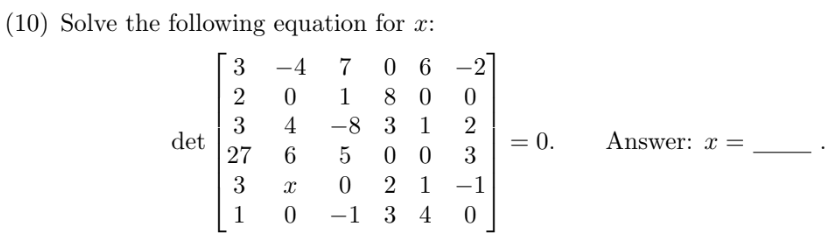

In [24]:
# If det is 0, then at least two rows and two columns are linearly dependent.
# Column 2 can be 2 * Column 6, so if x = -2, the det should be 0
# Let's check
A10 =   Matrix([[ 3, -4,  7, 0, 6, -2],
                [ 2,  0,  1, 8, 0,  0],
                [ 3,  4, -8, 3, 1,  2],
                [27,  6,  5, 0, 0,  3],
                [ 3, -2,  0, 2, 1, -1],
                [ 1,  0, -1, 3, 4,  0]])
mprint(A10)
ansprint(f"When x = -2, the determinant is {A10.det()}")

<IPython.core.display.Math object>

***********************************--ANSWER--***********************************

When x = -2, the determinant is 0

***********************************--ANSWER--***********************************


# Exercise 11

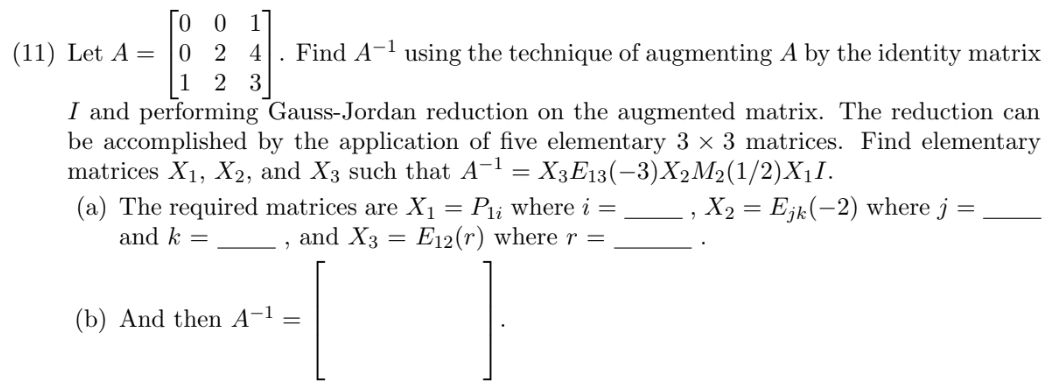

In [25]:
A11 = Matrix(np.matrix('0 0 1;0 2 4;1 2 3'))
Aug11 = Matrix.hstack(A11, Matrix.eye(3))
# I'll use my functions and then convert to his notation
Res11 = Aug11.row_switch(1,3).row_replace(1,-3,3).row_replace(2,-4,3).row_scale(2,Rational(1/2)).row_replace(1,-2,2)
Res11

Matrix([
[1, 0, 0,  1,  -1, 1],
[0, 1, 0, -2, 1/2, 0],
[0, 0, 1,  1,   0, 0]])

In [26]:
# In his notation: P13 * E13(-3) * E23(-4) * M2(1/2) * E12(-2)
ansprint("i = 3, j = 2, k = 3, and r = -2. inv(A) is below:")
mprint(Res11[0:3,3:6])

***********************************--ANSWER--***********************************

i = 3, j = 2, k = 3, and r = -2. inv(A) is below:

***********************************--ANSWER--***********************************


<IPython.core.display.Math object>

# Exercise 12

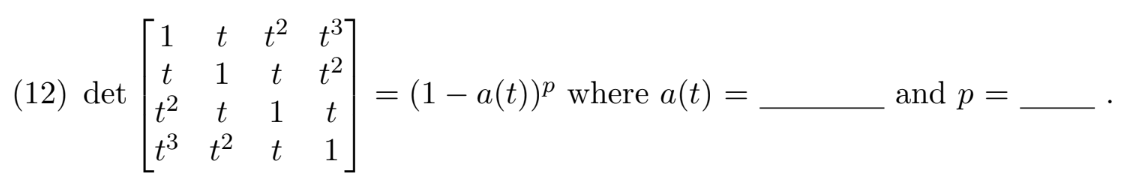

In [27]:
# not sure how I should know this, so I'll just calculate it in sympy
t = symbols('t')
A12 = Matrix([[t**0, t**1, t**2, t**3],
              [t**1, t**0, t**1, t**2],
              [t**2, t**1, t**0, t**1],
              [t**3, t**2, t**1, t**0]])
A12

Matrix([
[   1,    t, t**2, t**3],
[   t,    1,    t, t**2],
[t**2,    t,    1,    t],
[t**3, t**2,    t,    1]])

In [28]:
A12.det()

-t**6 + 3*t**4 - 3*t**2 + 1

In [29]:
expand((1-t*t)**3)

-t**6 + 3*t**4 - 3*t**2 + 1

In [30]:
# By trial and error, I figured it out:
# I think this problem has something to do with eigenvalues.
ansprint("a(t) = t*t, p = 3")

***********************************--ANSWER--***********************************

a(t) = t*t, p = 3

***********************************--ANSWER--***********************************


# Exercise 13

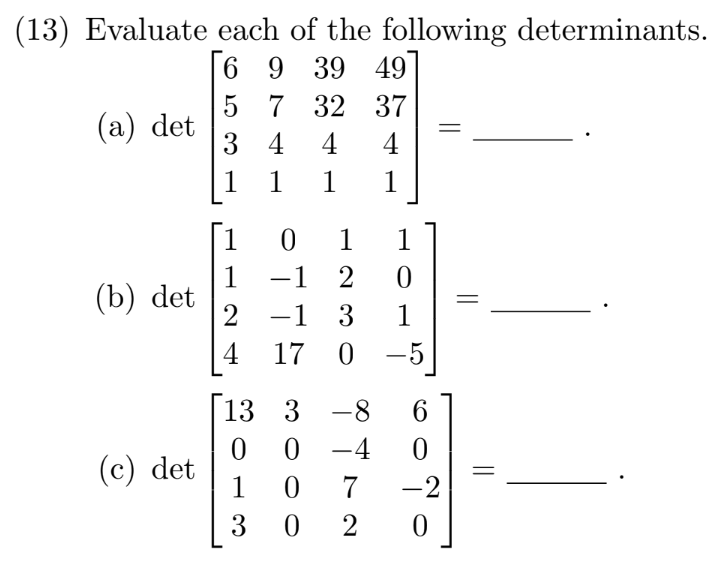

In [31]:
# I think these are very involved calculations.
# Let's try with Avar
mprint(Avar)
Avar.det()

<IPython.core.display.Math object>

a*f*k*p - a*f*l*o - a*g*j*p + a*g*l*n + a*h*j*o - a*h*k*n - b*e*k*p + b*e*l*o + b*g*i*p - b*g*l*m - b*h*i*o + b*h*k*m + c*e*j*p - c*e*l*n - c*f*i*p + c*f*l*m + c*h*i*n - c*h*j*m - d*e*j*o + d*e*k*n + d*f*i*o - d*f*k*m - d*g*i*n + d*g*j*m

In [32]:
# Wow!  I'm not doing that. Let's just calculate with sympy
A13a = Matrix(np.matrix('6 9 39 49;5 7 32 37;3 4 4 4;1 1 1 1'))
A13a.det()

100

In [33]:
A13b = Matrix(np.matrix('1 0 1 1;1 -1 2 0;2 -1 3 1;4 17 0 -5'))
A13b.det()

0

In [34]:
A13c = Matrix(np.matrix('13 3 -8 6;0 0 -4 0;1 0 7 -2;3 0 2 0'))
A13c.det()

-72

In [35]:
ansprint(f"The determinant in (a) is {A13a.det()}, in (b) is {A13b.det()}, and in (c) is {A13c.det()}")

***********************************--ANSWER--***********************************

The determinant in (a) is 100, in (b) is 0, and in (c) is -72

***********************************--ANSWER--***********************************


# Exercise 14

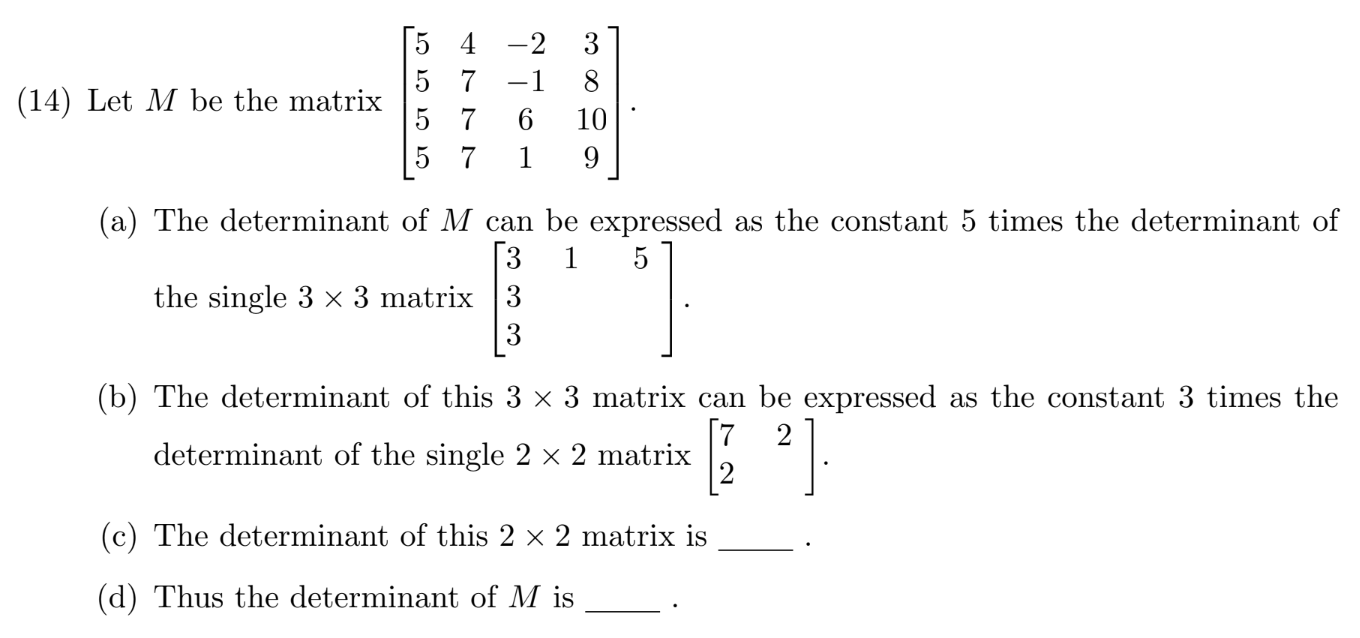

In [36]:
# With modern computers, I don't think we need to figure out tricks for calculating determinants, so
A14 = Matrix(np.matrix('5 4 -2 3;5 7 -1 8;5 7 6 10;5 7 1 9'))
ansprint(f"(d) determinant of M is {A14.det()}")

***********************************--ANSWER--***********************************

(d) determinant of M is 45

***********************************--ANSWER--***********************************


In [37]:
# if M is 45, then the determinant of the 3x3 matrix is 9
# that means the determinant of the 2x2 matrix is 3
# I can do the determinant of the 2x2 which is 7*x - 2*2 = 3, so x = 1

# Exercises 15-17
Just calculating determinants so I skipped them.

# Exercise 18

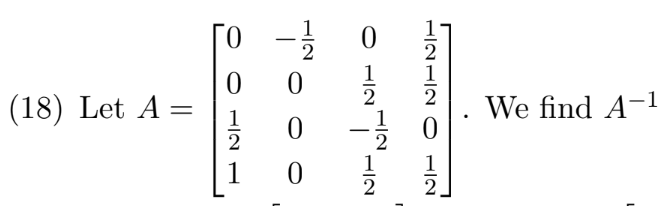

In [38]:
# the problem is to find it using Gauss-Jordan but I already know how to do that
# but I'm curious what the answer is
half = Rational(1,2)
A18 = Matrix([[0, -half, 0, half],
              [0, 0, half, half],
              [half, 0, -half, 0],
              [1, 0, half, half]])
A18

Matrix([
[  0, -1/2,    0, 1/2],
[  0,    0,  1/2, 1/2],
[1/2,    0, -1/2,   0],
[  1,    0,  1/2, 1/2]])

In [39]:
A18.inv()

Matrix([
[ 0, -1,  0,  1],
[-2,  3,  2, -1],
[ 0, -1, -2,  1],
[ 0,  3,  2, -1]])

In [40]:
# and check it makes the identity matrix
A18 * A18.inv()

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

# Exercise 19

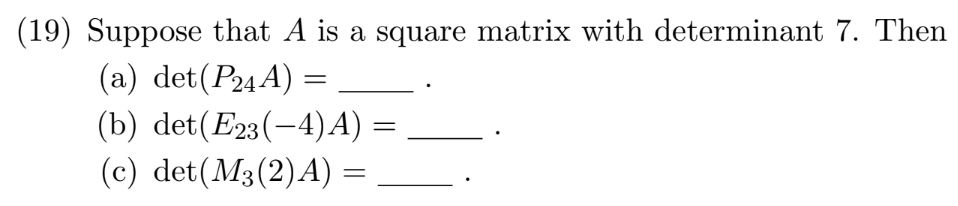

In [41]:
# Matrix manipulations have the following effects on the determinant:
# Row swapping (I): If two rows are swapped, the determinant of the resulting matrix is multiplied by −1
# Scaling a row (II): If a row is multiplied by a nonzero scalar (k), the determinant is multiplied by (k).
# Adding a multiple of one row to another (III): This operation does not change the determinant.
ansprint("(a) -7, (b) 7, (c) 14")

***********************************--ANSWER--***********************************

(a) -7, (b) 7, (c) 14

***********************************--ANSWER--***********************************


# Problem 1

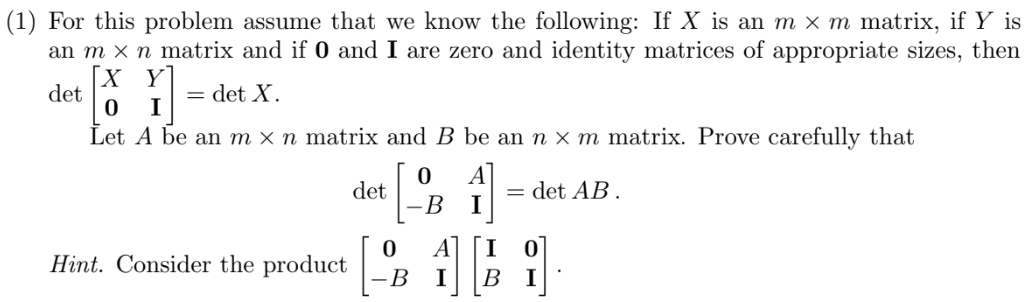

In [ ]:
# In the first case, the determinant is det(X*I - 0*Y) = det(X)
# in the second case, the determinant is det(0*I - -B*A) = det(B*A) ?= det(A*B)
# For square matrices, det(A*B) = det(B*A), but it doesn't hold if A & B are different sizes

In [ ]:
# I asked grok to think on the question so I can understand the lesson
# Grok did a bunch of computations and demonstrated the second case
# Let's see if sympy can do it symbolically

In [43]:
# Test first case symbolically
a, b, c, d, e, f, g, h, i, j = symbols('a, b, c, d, e, f, g, h, i, j')
X = Matrix([[a,b],[c,d]]) # 2x2
Y = Matrix([[e,f,g],[h,i,j]]) # 2x3
mprint(X)
mprint(Y)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
Big1 = Matrix.vstack(Matrix.hstack(X,Y), Matrix.hstack(Matrix.zeros(3,2),Matrix.eye(3)))
Big1

Matrix([
[a, b, e, f, g],
[c, d, h, i, j],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

In [54]:
print(f"These should be equal: det(Big1) = {Big1.det()}\n" +
      f"                          det(X) = {X.det()}")

These should be equal: det(Big1) = a*d - b*c
                          det(X) = a*d - b*c


In [48]:
# OK, let's test 2nd case symbolically

a*d - b*c

In [55]:
a, b, c, d, e, f, g, h, i, j, k, l = symbols('a, b, c, d, e, f, g, h, i, j, k, l')
A = Matrix([[a,b],[c,d],[e,f]]) # 3x2
B = Matrix([[g,h,i],[j,k,l]]) # 2x3
mprint(A)
mprint(B)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [56]:
Big2 = Matrix.vstack(Matrix.hstack(Matrix.zeros(3,3), A), Matrix.hstack(-B,Matrix.eye(2)))
Big2

Matrix([
[ 0,  0,  0, a, b],
[ 0,  0,  0, c, d],
[ 0,  0,  0, e, f],
[-g, -h, -i, 1, 0],
[-j, -k, -l, 0, 1]])

In [57]:
ansprint(f"These should be equal: det(Big2) = {Big2.det()}\n" +
         f"                         det(AB) = {(A*B).det()}")

***********************************--ANSWER--***********************************

These should be equal: det(Big2) = 0
                         det(AB) = 0

***********************************--ANSWER--***********************************


In [58]:
(B*A).det()

a*d*g*k - a*d*h*j + a*f*g*l - a*f*i*j - b*c*g*k + b*c*h*j - b*e*g*l + b*e*i*j + c*f*h*l - c*f*i*k - d*e*h*l + d*e*i*k

In [66]:
(A*B).det() # that's crazy!
# apparently it's because the rank of A*B can't be greater than the rank of either A or B

0

In [60]:
mprint(A*B)

<IPython.core.display.Math object>

In [61]:
mprint(B*A)

<IPython.core.display.Math object>

In [62]:
# let's try by swapping A and B (should also work)
Big3 = Matrix.vstack(Matrix.hstack(Matrix.zeros(2,2), B), Matrix.hstack(-A,Matrix.eye(3)))
Big3

Matrix([
[ 0,  0, g, h, i],
[ 0,  0, j, k, l],
[-a, -b, 1, 0, 0],
[-c, -d, 0, 1, 0],
[-e, -f, 0, 0, 1]])

In [64]:
ansprint(f"These should be equal: det(Big3) = {Big3.det()}\n" +
         f"                         det(BA) = {(B*A).det()}")

***********************************--ANSWER--***********************************

These should be equal: det(Big3) = a*d*g*k - a*d*h*j + a*f*g*l - a*f*i*j - b*c*g*k + b*c*h*j - b*e*g*l + b*e*i*j + c*f*h*l - c*f*i*k - d*e*h*l + d*e*i*k
                         det(BA) = a*d*g*k - a*d*h*j + a*f*g*l - a*f*i*j - b*c*g*k + b*c*h*j - b*e*g*l + b*e*i*j + c*f*h*l - c*f*i*k - d*e*h*l + d*e*i*k

***********************************--ANSWER--***********************************


# Problem 2

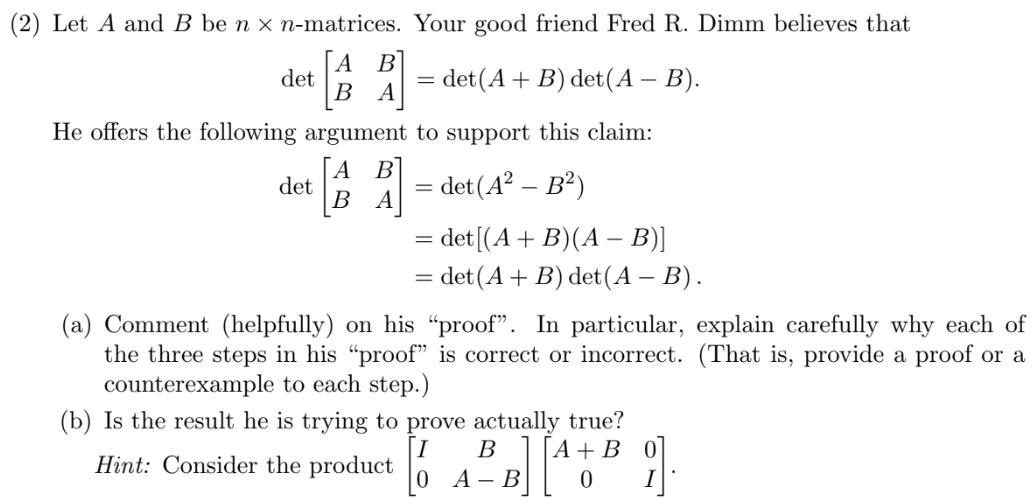

In [4]:
# let test symbolically with sympy
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r = symbols('a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r')
A33 = Matrix([[a,b,c],
            [d,e,f],
            [g,h,i]])
B33 = Matrix([[j,k,l],
            [m,n,o],
            [p,q,r]])
M99 = Matrix.vstack(Matrix.hstack(A33,B33),Matrix.hstack(B33,A33))
mprint(M99)

<IPython.core.display.Math object>

In [20]:
M99det = M99.det() # this takes a few minutes and give a glorious expression!

In [21]:
M99det

a**2*e**2*i**2 - a**2*e**2*r**2 - 2*a**2*e*f*h*i + 2*a**2*e*f*q*r + 2*a**2*e*h*o*r - 2*a**2*e*i*o*q + a**2*f**2*h**2 - a**2*f**2*q**2 - 2*a**2*f*h*n*r + 2*a**2*f*i*n*q - a**2*h**2*o**2 + 2*a**2*h*i*n*o - a**2*i**2*n**2 + a**2*n**2*r**2 - 2*a**2*n*o*q*r + a**2*o**2*q**2 - 2*a*b*d*e*i**2 + 2*a*b*d*e*r**2 + 2*a*b*d*f*h*i - 2*a*b*d*f*q*r - 2*a*b*d*h*o*r + 2*a*b*d*i*o*q + 2*a*b*e*f*g*i - 2*a*b*e*f*p*r - 2*a*b*e*g*o*r + 2*a*b*e*i*o*p - 2*a*b*f**2*g*h + 2*a*b*f**2*p*q + 2*a*b*f*g*n*r + 2*a*b*f*h*m*r - 2*a*b*f*i*m*q - 2*a*b*f*i*n*p + 2*a*b*g*h*o**2 - 2*a*b*g*i*n*o - 2*a*b*h*i*m*o + 2*a*b*i**2*m*n - 2*a*b*m*n*r**2 + 2*a*b*m*o*q*r + 2*a*b*n*o*p*r - 2*a*b*o**2*p*q + 2*a*c*d*e*h*i - 2*a*c*d*e*q*r - 2*a*c*d*f*h**2 + 2*a*c*d*f*q**2 + 2*a*c*d*h*n*r - 2*a*c*d*i*n*q - 2*a*c*e**2*g*i + 2*a*c*e**2*p*r + 2*a*c*e*f*g*h - 2*a*c*e*f*p*q + 2*a*c*e*g*o*q - 2*a*c*e*h*m*r - 2*a*c*e*h*o*p + 2*a*c*e*i*m*q - 2*a*c*f*g*n*q + 2*a*c*f*h*n*p - 2*a*c*g*h*n*o + 2*a*c*g*i*n**2 + 2*a*c*h**2*m*o - 2*a*c*h*i*m*n + 2*a*c*m*n*

In [7]:
# okay, a 9x9 matrix seems to have broken sympy!, let's try 4x4
A22 = Matrix([[a,b],[c,d]])
B22 = Matrix([[e,f],[g,h]])
M44 = Matrix.vstack(Matrix.hstack(A22,B22),Matrix.hstack(B22,A22))
mprint(M44)

<IPython.core.display.Math object>

In [9]:
M44det = M44.det(); M44det

a**2*d**2 - a**2*h**2 - 2*a*b*c*d + 2*a*b*g*h + 2*a*c*f*h - 2*a*d*f*g + b**2*c**2 - b**2*g**2 - 2*b*c*e*h + 2*b*d*e*g - c**2*f**2 + 2*c*d*e*f - d**2*e**2 + e**2*h**2 - 2*e*f*g*h + f**2*g**2

In [17]:
AplusB = (A22+B22)
AplusBdet = AplusB.det()
AplusBdet

a*d + a*h - b*c - b*g - c*f + d*e + e*h - f*g

In [18]:
AminusB = (A22-B22)
AminusBdet = AminusB.det()
AminusBdet

a*d - a*h - b*c + b*g + c*f - d*e + e*h - f*g

In [19]:
ProposedDet = simplify((AplusBdet * AminusBdet).expand())
ProposedDet

a**2*d**2 - a**2*h**2 - 2*a*b*c*d + 2*a*b*g*h + 2*a*c*f*h - 2*a*d*f*g + b**2*c**2 - b**2*g**2 - 2*b*c*e*h + 2*b*d*e*g - c**2*f**2 + 2*c*d*e*f - d**2*e**2 + e**2*h**2 - 2*e*f*g*h + f**2*g**2

In [23]:
A2minusB2 = (A22*A22 - B22*B22)
A2minusB2.det()

a**2*d**2 - a**2*f*g - a**2*h**2 - 2*a*b*c*d + a*b*e*g + a*b*g*h + a*c*e*f + a*c*f*h + b**2*c**2 - b*c*e**2 - 2*b*c*f*g - b*c*h**2 + b*d*e*g + b*d*g*h + c*d*e*f + c*d*f*h - d**2*e**2 - d**2*f*g + e**2*h**2 - 2*e*f*g*h + f**2*g**2

In [24]:
ApBtimesAmB = (A22+B22)*(A22-B22)
ApBtimesAmB.det()

a**2*d**2 - a**2*h**2 - 2*a*b*c*d + 2*a*b*g*h + 2*a*c*f*h - 2*a*d*f*g + b**2*c**2 - b**2*g**2 - 2*b*c*e*h + 2*b*d*e*g - c**2*f**2 + 2*c*d*e*f - d**2*e**2 + e**2*h**2 - 2*e*f*g*h + f**2*g**2

In [26]:
ansprint("(a) The first step is not true when calculate it symbolically.\n" +
         "    (Grok says it is true only if A and B are commuting)\n"
         "    The second and third steps, however, are true.\n" +
         "    Going from the 2nd to the 3rd makes sense because det(AB) = det(A)*det(B)")

***********************************--ANSWER--***********************************

(a) The first step is not true when calculate it symbolically.
    (Grok says it is true only if A and B are commuting)
    The second and third steps, however, are true.
    Going from the 2nd to the 3rd makes sense because det(AB) = det(A)*det(B)

***********************************--ANSWER--***********************************


In [28]:
M44det

a**2*d**2 - a**2*h**2 - 2*a*b*c*d + 2*a*b*g*h + 2*a*c*f*h - 2*a*d*f*g + b**2*c**2 - b**2*g**2 - 2*b*c*e*h + 2*b*d*e*g - c**2*f**2 + 2*c*d*e*f - d**2*e**2 + e**2*h**2 - 2*e*f*g*h + f**2*g**2

In [29]:
ProposedDet

a**2*d**2 - a**2*h**2 - 2*a*b*c*d + 2*a*b*g*h + 2*a*c*f*h - 2*a*d*f*g + b**2*c**2 - b**2*g**2 - 2*b*c*e*h + 2*b*d*e*g - c**2*f**2 + 2*c*d*e*f - d**2*e**2 + e**2*h**2 - 2*e*f*g*h + f**2*g**2

In [30]:
ansprint("(b) The two expressions above are the same so I think the claim is true.")

***********************************--ANSWER--***********************************

(b) The two expressions above are the same so I think the claim is true.

***********************************--ANSWER--***********************************


# Problem 3

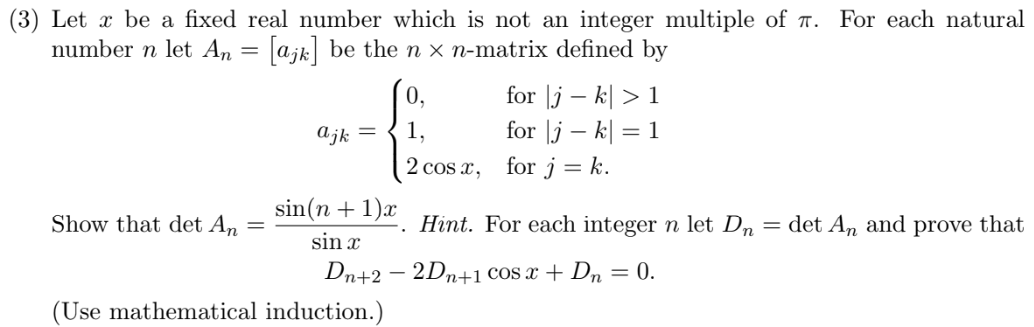

In [32]:
# let's just do it for the 2x2 example
x = symbols('x')
P32 = Matrix([[2*cos(x),1],[1,2*cos(x)]]); P32

Matrix([
[2*cos(x),        1],
[       1, 2*cos(x)]])

In [33]:
P32.det()

4*cos(x)**2 - 1

In [37]:
detA2 = sin(3*x)/sin(x)
detA2

sin(3*x)/sin(x)

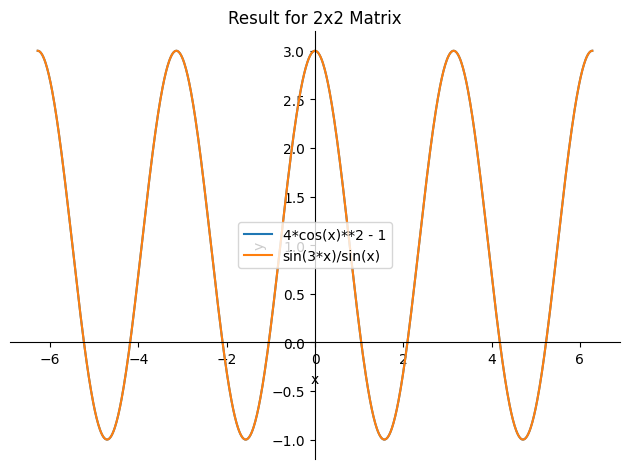

In [44]:
# graph the two -- They are the same!
from sympy import symbols, sin, cos
from sympy.plotting import plot

# Define the variable
x = symbols('x')

# Define the functions
f1 = P32.det()
f2 = detA2

# Plot both functions
plot(f1, f2, (x, -2*3.14159, 2*3.14159),
     title="Result for 2x2 Matrix",
     xlabel="x", ylabel="y",
     legend=True,
     show=True)

In [46]:
# try for 3x3 example
x = symbols('x')
P33 = Matrix([[2*cos(x),1,0],
              [1,2*cos(x),1],
              [0,1,2*cos(x)]]); P33

Matrix([
[2*cos(x),        1,        0],
[       1, 2*cos(x),        1],
[       0,        1, 2*cos(x)]])

In [47]:
P33det = P33.det(); P33det

8*cos(x)**3 - 4*cos(x)

In [48]:
detA3 = sin(4*x)/sin(x)
detA3

sin(4*x)/sin(x)

In [51]:
display(Math(latex(P33det) + "," + latex(detA3)))

<IPython.core.display.Math object>

In [52]:
print(P33det)
print(detA3)

8*cos(x)**3 - 4*cos(x)
sin(4*x)/sin(x)


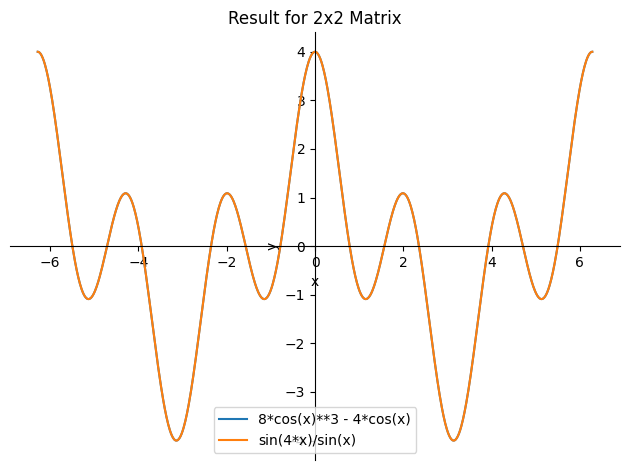

In [49]:
# graph the two -- They are the same!
from sympy import symbols, sin, cos
from sympy.plotting import plot

# Define the variable
x = symbols('x')

# Define the functions
f1 = P33.det()
f2 = detA3

# Plot both functions
plot(f1, f2, (x, -2*3.14159, 2*3.14159),
     title="Result for 2x2 Matrix",
     xlabel="x", ylabel="y",
     legend=True,
     show=True)

In [53]:
ansprint("Computing the determinant symbolically and graphing for n=2 and 3 showed the statement to be true.")

***********************************--ANSWER--***********************************

Computing the determinant symbolically and graphing for n=2 and 3 showed the statement to be true.

***********************************--ANSWER--***********************************
